In [1]:
import pandas as pd
import json
import numpy as np
import pickle
from ast import literal_eval
import sys

sys.path.append('../datawrangling')

# import modules
import dataloader_paths
from Gretel_path_prediction import GretelPathPrediction

import warnings
warnings.filterwarnings('ignore')

In [2]:
load_model = False
directory = '../../models/gretel_prediction_models/tromso_small/'
path_format = 'node2node'
# Either load model from file...
if load_model:
    # load model from file
    network_name = '202204_waypoints_DP10_HDBSCAN13_tromso_full_UTM'
    model_path = '../../models/gretel_prediction_models/trained_models/'+network_name+'.obj'
    fileObj = open(model_path, 'rb')
    model = pickle.load(fileObj)
    fileObj.close()
    with open('../../models/gretel_prediction_models/trained_models/metadata.json', 'r') as json_file:
        meta_dict = json.load(json_file)
    data_version = meta_dict['data_version']    
    print(meta_dict)
    
# ... or train model from scratch
else:
    directory = '../../models/gretel_prediction_models/tromso_small/'
    path_format = 'node2node'
    config_file = 'route_target'
    task = 'path'
    # load metadata file
    with open(directory+path_format+'/metadata.json', 'r') as json_file:
        meta_dict = json.load(json_file)
    network_name = meta_dict['network_name']
    data_version = meta_dict['data_version']
    # train model
    model = GretelPathPrediction()
    model.train(config_file, directory, task)

number of trajectories:  2927
number of valid trajectories (length in [2, 101]): 2927
trajectories length: min 2 | max 101 | mean 24.83
split train/(valid)?/test 0.8/0.2
==== START "tromso_small" ====
Checkpoints will be saved in [../../models/gretel_prediction_models/tromso_small/chkpt/tromso_small]
Number of node features 1. Number of edge features 3
No initial edge transformer.
Computing non backtracking edges...
Done
=== BASELINE ===
TEST DATASET


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:03<00:00, 193.31it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.326799 |
| choice_accuracy      | 0.343226 |
| choice_accuracy_deg3 | 0.343226 |
| precision_top1       | 0.308482 |
| precision_top5       | 0.847123 |
| path_nll             | 1.39239  |
| path_nll_deg3        | 1.39239  |
TRAIN DATASET


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2341/2341 [00:10<00:00, 217.72it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.333452 |
| choice_accuracy      | 0.341516 |
| choice_accuracy_deg3 | 0.341516 |
| precision_top1       | 0.309809 |
| precision_top5       | 0.859588 |
| path_nll             | 1.3605   |
| path_nll_deg3        | 1.3605   |
=== NON BACKTRACKING BASELINE ===
TEST DATASET


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:09<00:00, 62.78it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.326799 |
| choice_accuracy      | 0.336342 |
| choice_accuracy_deg3 | 0.336342 |
| precision_top1       | 0.308482 |
| precision_top5       | 0.847123 |
| path_nll             | 1.39239  |
| path_nll_deg3        | 1.39239  |
TRAIN DATASET


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2341/2341 [00:36<00:00, 63.75it/s]

| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.333452 |
| choice_accuracy      | 0.341332 |
| choice_accuracy_deg3 | 0.341332 |
| precision_top1       | 0.309809 |
| precision_top5       | 0.859588 |
| path_nll             | 1.3605   |
| path_nll_deg3        | 1.3605   |
Computing non backtracking graph... 

Done

=== TEST ===



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:15<00:00, 37.00it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.330743 |
| choice_accuracy      | 0.418691 |
| choice_accuracy_deg3 | 0.418691 |
| precision_top1       | 0.438239 |
| precision_top5       | 0.863034 |
| path_nll             | 1.37798  |
| path_nll_deg3        | 1.37798  |

=== EPOCH 0 ===
Progress 10% | iter 45 | 1538.4 pred/s | loss target_only -6.0824208650807656e-05
Progress 20% | iter 91 | 1532.8 pred/s | loss target_only -7.065925656745814e-05
Progress 30% | iter 137 | 1542.0 pred/s | loss target_only -7.008170989169668e-05
Progress 40% | iter 183 | 1522.9 pred/s | loss target_only -8.105950621354848e-05
Progress 50% | iter 229 | 1566.2 pred/s | loss target_only -7.834634977473458e-05
Progress 60% | iter 275 | 1590.1 pred/s | loss target_only -7.602035511242534e-05
Progress 70% | iter 321 | 1544.2 pred/s | loss target_only -8.097978582368309e-05
Progress 80% | iter 367 | 1568.7 pred/s | loss target_only -8.806406882679095e-05
Prog

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:15<00:00, 38.13it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.548582 |
| choice_accuracy      | 0.774971 |
| choice_accuracy_deg3 | 0.774971 |
| precision_top1       | 0.772828 |
| precision_top5       | 0.976296 |
| path_nll             | 0.836948 |
| path_nll_deg3        | 0.836948 |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/tromso_small/chkpt/tromso_small/0000.pt

=== EPOCH 1 ===
Progress 10% | iter 45 | 1479.3 pred/s | loss target_only -0.00010783001514766184
Progress 20% | iter 91 | 1580.3 pred/s | loss target_only -9.699941285541473e-05
Progress 30% | iter 137 | 1417.8 pred/s | loss target_only -0.00010084586399522663
Progress 40% | iter 183 | 1403.0 pred/s | loss target_only -0.00011615546647309423
Progress 50% | iter 229 | 1367.1 pred/s | loss target_only -0.0001083283701419676
Progress 60% | iter 275 | 1268.0 pred/s | loss target_only -0.00011742467068878747
Progress 70% | iter 321 | 1561.8 pred/s | loss tar

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:18<00:00, 32.09it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.703601 |
| choice_accuracy      | 0.781985 |
| choice_accuracy_deg3 | 0.781985 |
| precision_top1       | 0.78205  |
| precision_top5       | 0.980777 |
| path_nll             | 0.752069 |
| path_nll_deg3        | 0.752069 |

=== EPOCH 2 ===
Progress 10% | iter 45 | 1516.7 pred/s | loss target_only -0.00011320206320435781
Progress 20% | iter 91 | 1513.5 pred/s | loss target_only -0.00011868603632812979
Progress 30% | iter 137 | 1448.8 pred/s | loss target_only -0.0001306428705799992
Progress 40% | iter 183 | 1155.0 pred/s | loss target_only -0.00011796107406918598
Progress 50% | iter 229 | 1150.0 pred/s | loss target_only -0.00013014245837750628
Progress 60% | iter 275 | 1239.5 pred/s | loss target_only -0.0001259009907618629
Progress 70% | iter 321 | 1387.3 pred/s | loss target_only -0.00012639364194783935
Progress 80% | iter 367 | 1444.0 pred/s | loss target_only -0.0001281744863880312


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:18<00:00, 31.58it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.740464 |
| choice_accuracy      | 0.779192 |
| choice_accuracy_deg3 | 0.779192 |
| precision_top1       | 0.778737 |
| precision_top5       | 0.977335 |
| path_nll             | 0.849694 |
| path_nll_deg3        | 0.849694 |

=== EPOCH 3 ===
Progress 10% | iter 45 | 1254.6 pred/s | loss target_only -0.0001348860789111893
Progress 20% | iter 91 | 1413.6 pred/s | loss target_only -0.00012272979248471226
Progress 30% | iter 137 | 1352.8 pred/s | loss target_only -0.00013237848024315782
Progress 40% | iter 183 | 1359.5 pred/s | loss target_only -0.00014041850086827625
Progress 50% | iter 229 | 1375.9 pred/s | loss target_only -0.00012516979493146363
Progress 60% | iter 275 | 1418.2 pred/s | loss target_only -0.00012204180186317035
Progress 70% | iter 321 | 1445.0 pred/s | loss target_only -0.0001192309445252575
Progress 80% | iter 367 | 1346.7 pred/s | loss target_only -0.00012901906182429278

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:17<00:00, 33.25it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.753393 |
| choice_accuracy      | 0.781595 |
| choice_accuracy_deg3 | 0.781595 |
| precision_top1       | 0.782569 |
| precision_top5       | 0.980842 |
| path_nll             | 0.85277  |
| path_nll_deg3        | 0.85277  |

=== EPOCH 4 ===
Progress 10% | iter 45 | 1473.0 pred/s | loss target_only -0.0001235352998762411
Progress 20% | iter 91 | 1451.1 pred/s | loss target_only -0.00013403841859228543
Progress 30% | iter 137 | 1464.4 pred/s | loss target_only -0.0001259197909458048
Progress 40% | iter 183 | 1456.8 pred/s | loss target_only -0.00012654336727086006
Progress 50% | iter 229 | 1336.0 pred/s | loss target_only -0.00013925705627682443
Progress 60% | iter 275 | 1429.9 pred/s | loss target_only -0.0001230215669240012
Progress 70% | iter 321 | 1343.7 pred/s | loss target_only -0.00014454274122213678
Progress 80% | iter 367 | 1306.0 pred/s | loss target_only -0.00013260487841086342


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 34.55it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.739584 |
| choice_accuracy      | 0.782244 |
| choice_accuracy_deg3 | 0.782244 |
| precision_top1       | 0.779712 |
| precision_top5       | 0.979478 |
| path_nll             | 0.802704 |
| path_nll_deg3        | 0.802704 |

=== EPOCH 5 ===
Progress 10% | iter 45 | 1355.1 pred/s | loss target_only -0.00012634204136682784
Progress 20% | iter 91 | 1353.6 pred/s | loss target_only -0.00012414271544720332
Progress 30% | iter 137 | 1311.3 pred/s | loss target_only -0.00012406849326795862
Progress 40% | iter 183 | 1311.0 pred/s | loss target_only -0.0001292419617569081
Progress 50% | iter 229 | 1310.1 pred/s | loss target_only -0.00013633080545804183
Progress 60% | iter 275 | 1403.7 pred/s | loss target_only -0.00013086991006855956
Progress 70% | iter 321 | 1435.2 pred/s | loss target_only -0.00013236059631680332
Progress 80% | iter 367 | 1483.2 pred/s | loss target_only -0.0001182678248154820

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:17<00:00, 33.77it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.762536 |
| choice_accuracy      | 0.789583 |
| choice_accuracy_deg3 | 0.789583 |
| precision_top1       | 0.789518 |
| precision_top5       | 0.981361 |
| path_nll             | 0.920536 |
| path_nll_deg3        | 0.920536 |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/tromso_small/chkpt/tromso_small/0005.pt

=== EPOCH 6 ===
Progress 10% | iter 45 | 1343.1 pred/s | loss target_only -0.00013246672895677114
Progress 20% | iter 91 | 1355.5 pred/s | loss target_only -0.00013392776864954266
Progress 30% | iter 137 | 1347.6 pred/s | loss target_only -0.00013417826421821422
Progress 40% | iter 183 | 1305.5 pred/s | loss target_only -0.00013702388025506
Progress 50% | iter 229 | 1317.7 pred/s | loss target_only -0.00012263698725662454
Progress 60% | iter 275 | 1322.0 pred/s | loss target_only -0.00012445269728947079
Progress 70% | iter 321 | 1415.4 pred/s | loss targ

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:17<00:00, 33.05it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.733446 |
| choice_accuracy      | 0.790557 |
| choice_accuracy_deg3 | 0.790557 |
| precision_top1       | 0.788219 |
| precision_top5       | 0.980387 |
| path_nll             | 0.780368 |
| path_nll_deg3        | 0.780368 |

=== EPOCH 7 ===
Progress 10% | iter 45 | 1490.2 pred/s | loss target_only -0.00012593617931604955
Progress 20% | iter 91 | 1368.3 pred/s | loss target_only -0.00011974173709915183
Progress 30% | iter 137 | 1239.6 pred/s | loss target_only -0.00013057553853022564
Progress 40% | iter 183 | 1153.4 pred/s | loss target_only -0.00013385731906832593
Progress 50% | iter 229 | 1179.2 pred/s | loss target_only -0.00014020180315507333
Progress 60% | iter 275 | 1457.2 pred/s | loss target_only -0.00013326388421745937
Progress 70% | iter 321 | 1503.0 pred/s | loss target_only -0.00012364838229782417
Progress 80% | iter 367 | 1481.9 pred/s | loss target_only -0.000130725335494230

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 36.03it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.765382 |
| choice_accuracy      | 0.787245 |
| choice_accuracy_deg3 | 0.787245 |
| precision_top1       | 0.78705  |
| precision_top5       | 0.978763 |
| path_nll             | 0.938012 |
| path_nll_deg3        | 0.938012 |

=== EPOCH 8 ===
Progress 10% | iter 45 | 1412.7 pred/s | loss target_only -0.00014680049060048983
Progress 20% | iter 91 | 1492.1 pred/s | loss target_only -0.00012585479649240093
Progress 30% | iter 137 | 1470.1 pred/s | loss target_only -0.00012714877203477438
Progress 40% | iter 183 | 1458.1 pred/s | loss target_only -0.00013889278830074158
Progress 50% | iter 229 | 1455.8 pred/s | loss target_only -0.00013926188266960124
Progress 60% | iter 275 | 1509.1 pred/s | loss target_only -0.00011484211513705619
Progress 70% | iter 321 | 1501.1 pred/s | loss target_only -0.00012809920602876076
Progress 80% | iter 367 | 1350.8 pred/s | loss target_only -0.000132670319809448

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:15<00:00, 36.74it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.768262 |
| choice_accuracy      | 0.784647 |
| choice_accuracy_deg3 | 0.784647 |
| precision_top1       | 0.782569 |
| precision_top5       | 0.969217 |
| path_nll             | 1.0392   |
| path_nll_deg3        | 1.0392   |

=== EPOCH 9 ===
Progress 10% | iter 45 | 1447.8 pred/s | loss target_only -0.00014097310097104359
Progress 20% | iter 91 | 1459.9 pred/s | loss target_only -0.00013553081618758832
Progress 30% | iter 137 | 1474.9 pred/s | loss target_only -0.00013884552596974504
Progress 40% | iter 183 | 1434.0 pred/s | loss target_only -0.00014047323013493805
Progress 50% | iter 229 | 1494.4 pred/s | loss target_only -0.000133531427828975
Progress 60% | iter 275 | 1483.2 pred/s | loss target_only -0.0001279375068808517
Progress 70% | iter 321 | 1486.6 pred/s | loss target_only -0.00013290384479537352
Progress 80% | iter 367 | 1492.2 pred/s | loss target_only -0.00012074989754453337


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:15<00:00, 36.64it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.775718 |
| choice_accuracy      | 0.788024 |
| choice_accuracy_deg3 | 0.788024 |
| precision_top1       | 0.786141 |
| precision_top5       | 0.980712 |
| path_nll             | 1.05885  |
| path_nll_deg3        | 1.05885  |

=== EPOCH 10 ===
Progress 10% | iter 45 | 1473.7 pred/s | loss target_only -0.0001237959060571507
Progress 20% | iter 91 | 1484.1 pred/s | loss target_only -0.0001350309870017609
Progress 30% | iter 137 | 1468.8 pred/s | loss target_only -0.00012894829534699964
Progress 40% | iter 183 | 1460.3 pred/s | loss target_only -0.00012455730078421505
Progress 50% | iter 229 | 1256.1 pred/s | loss target_only -0.0001210838721850529
Progress 60% | iter 275 | 1387.5 pred/s | loss target_only -0.00014363332150020238
Progress 70% | iter 321 | 1449.7 pred/s | loss target_only -0.0001368881686866078
Progress 80% | iter 367 | 1376.7 pred/s | loss target_only -0.00013694014742884507


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 36.39it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.774446 |
| choice_accuracy      | 0.788154 |
| choice_accuracy_deg3 | 0.788154 |
| precision_top1       | 0.788284 |
| precision_top5       | 0.97136  |
| path_nll             | 1.1548   |
| path_nll_deg3        | 1.1548   |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/tromso_small/chkpt/tromso_small/0010.pt

=== EPOCH 11 ===
Progress 10% | iter 45 | 1492.4 pred/s | loss target_only -0.00012803833823319975
Progress 20% | iter 91 | 1441.9 pred/s | loss target_only -0.000141153559389661
Progress 30% | iter 137 | 1484.0 pred/s | loss target_only -0.00012450956701160447
Progress 40% | iter 183 | 1474.7 pred/s | loss target_only -0.00013059085718058683
Progress 50% | iter 229 | 1443.5 pred/s | loss target_only -0.00014086776774833908
Progress 60% | iter 275 | 1470.3 pred/s | loss target_only -0.0001329147551878691
Progress 70% | iter 321 | 1474.0 pred/s | loss tar

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 35.06it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.768696 |
| choice_accuracy      | 0.778543 |
| choice_accuracy_deg3 | 0.778543 |
| precision_top1       | 0.778673 |
| precision_top5       | 0.95415  |
| path_nll             | 1.19312  |
| path_nll_deg3        | 1.19312  |

=== EPOCH 12 ===
Progress 10% | iter 45 | 1438.9 pred/s | loss target_only -0.00013422072912949045
Progress 20% | iter 91 | 1447.4 pred/s | loss target_only -0.0001312022103501343
Progress 30% | iter 137 | 1394.9 pred/s | loss target_only -0.00012876152733621825
Progress 40% | iter 183 | 1302.1 pred/s | loss target_only -0.00013470026252950773
Progress 50% | iter 229 | 1430.9 pred/s | loss target_only -0.0001309455831128882
Progress 60% | iter 275 | 1472.8 pred/s | loss target_only -0.00013134491116770746
Progress 70% | iter 321 | 1461.8 pred/s | loss target_only -0.00013663726498224903
Progress 80% | iter 367 | 1438.4 pred/s | loss target_only -0.0001405679237367660

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 36.42it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.748065 |
| choice_accuracy      | 0.778543 |
| choice_accuracy_deg3 | 0.778543 |
| precision_top1       | 0.780686 |
| precision_top5       | 0.966359 |
| path_nll             | 0.951227 |
| path_nll_deg3        | 0.951227 |

=== EPOCH 13 ===
Progress 10% | iter 45 | 1357.5 pred/s | loss target_only -0.0001311109634007775
Progress 20% | iter 91 | 1247.1 pred/s | loss target_only -0.00013639187538558393
Progress 30% | iter 137 | 1416.5 pred/s | loss target_only -0.00013576878542558254
Progress 40% | iter 183 | 1420.8 pred/s | loss target_only -0.00013845941929479865
Progress 50% | iter 229 | 1453.3 pred/s | loss target_only -0.00013409910042919934
Progress 60% | iter 275 | 1488.7 pred/s | loss target_only -0.00013329757517224644
Progress 70% | iter 321 | 1463.4 pred/s | loss target_only -0.0001333086421537071
Progress 80% | iter 367 | 1422.5 pred/s | loss target_only -0.0001313913626895778

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 36.51it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.778347 |
| choice_accuracy      | 0.788674 |
| choice_accuracy_deg3 | 0.788674 |
| precision_top1       | 0.785232 |
| precision_top5       | 0.979803 |
| path_nll             | 1.17486  |
| path_nll_deg3        | 1.17486  |

=== EPOCH 14 ===
Progress 10% | iter 45 | 1435.6 pred/s | loss target_only -0.0001478824577862491
Progress 20% | iter 91 | 1458.6 pred/s | loss target_only -0.00013925417179355657
Progress 30% | iter 137 | 1437.8 pred/s | loss target_only -0.00013879352846774058
Progress 40% | iter 183 | 1469.4 pred/s | loss target_only -0.00013599528436317103
Progress 50% | iter 229 | 1490.0 pred/s | loss target_only -0.0001250157530750816
Progress 60% | iter 275 | 1464.1 pred/s | loss target_only -0.0001306758420883192
Progress 70% | iter 321 | 1497.7 pred/s | loss target_only -0.00012577574847181294
Progress 80% | iter 367 | 1502.1 pred/s | loss target_only -0.0001281599515498165


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 36.24it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.770474 |
| choice_accuracy      | 0.780946 |
| choice_accuracy_deg3 | 0.780946 |
| precision_top1       | 0.777569 |
| precision_top5       | 0.967398 |
| path_nll             | 1.34887  |
| path_nll_deg3        | 1.34887  |

=== EPOCH 15 ===
Progress 10% | iter 45 | 1427.1 pred/s | loss target_only -0.00014931139426940172
Progress 20% | iter 91 | 1497.5 pred/s | loss target_only -0.00012956244367466898
Progress 30% | iter 137 | 1455.1 pred/s | loss target_only -0.00012639714171400893
Progress 40% | iter 183 | 1476.9 pred/s | loss target_only -0.0001363704088001255
Progress 50% | iter 229 | 1495.2 pred/s | loss target_only -0.00012661450677094153
Progress 60% | iter 275 | 1458.4 pred/s | loss target_only -0.00013193399816444033
Progress 70% | iter 321 | 1459.4 pred/s | loss target_only -0.000126023048033279
Progress 80% | iter 367 | 1432.3 pred/s | loss target_only -0.00014519785677525172

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 35.93it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.774598 |
| choice_accuracy      | 0.787375 |
| choice_accuracy_deg3 | 0.787375 |
| precision_top1       | 0.782894 |
| precision_top5       | 0.968437 |
| path_nll             | 1.26672  |
| path_nll_deg3        | 1.26672  |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/tromso_small/chkpt/tromso_small/0015.pt

=== EPOCH 16 ===
Progress 10% | iter 45 | 1357.3 pred/s | loss target_only -0.00014076784436246406
Progress 20% | iter 91 | 1478.9 pred/s | loss target_only -0.00013206252601776814
Progress 30% | iter 137 | 1475.1 pred/s | loss target_only -0.0001302010090571785
Progress 40% | iter 183 | 1438.3 pred/s | loss target_only -0.00014378327028056938
Progress 50% | iter 229 | 1486.3 pred/s | loss target_only -0.0001262070145512555
Progress 60% | iter 275 | 1519.8 pred/s | loss target_only -0.00011860850202446672
Progress 70% | iter 321 | 1464.5 pred/s | loss ta

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 35.95it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.777688 |
| choice_accuracy      | 0.786985 |
| choice_accuracy_deg3 | 0.786985 |
| precision_top1       | 0.781465 |
| precision_top5       | 0.972074 |
| path_nll             | 1.36778  |
| path_nll_deg3        | 1.36778  |

=== EPOCH 17 ===
Progress 10% | iter 45 | 1503.9 pred/s | loss target_only -0.00012381792108835153
Progress 20% | iter 91 | 1464.8 pred/s | loss target_only -0.00013590237277778024
Progress 30% | iter 137 | 1498.8 pred/s | loss target_only -0.00012886441654614292
Progress 40% | iter 183 | 1288.9 pred/s | loss target_only -0.00013738681476309263
Progress 50% | iter 229 | 1176.0 pred/s | loss target_only -0.0001457495306459926
Progress 60% | iter 275 | 1255.6 pred/s | loss target_only -0.00013606515726554205
Progress 70% | iter 321 | 1291.2 pred/s | loss target_only -0.00014071430635239317
Progress 80% | iter 367 | 1292.3 pred/s | loss target_only -0.000141668696437078

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 35.93it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.755919 |
| choice_accuracy      | 0.778737 |
| choice_accuracy_deg3 | 0.778737 |
| precision_top1       | 0.775166 |
| precision_top5       | 0.962333 |
| path_nll             | 1.14773  |
| path_nll_deg3        | 1.14773  |

=== EPOCH 18 ===
Progress 10% | iter 45 | 1456.8 pred/s | loss target_only -0.00013128903106452835
Progress 20% | iter 91 | 1445.5 pred/s | loss target_only -0.00013979282861802385
Progress 30% | iter 137 | 1445.8 pred/s | loss target_only -0.00013632623412660722
Progress 40% | iter 183 | 1457.0 pred/s | loss target_only -0.00012914009500955242
Progress 50% | iter 229 | 1488.1 pred/s | loss target_only -0.00013157125702184627
Progress 60% | iter 275 | 1511.7 pred/s | loss target_only -0.00011838380499554756
Progress 70% | iter 321 | 1443.7 pred/s | loss target_only -0.000139807766698256
Progress 80% | iter 367 | 1508.7 pred/s | loss target_only -0.0001220211546449078

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 35.50it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.760229 |
| choice_accuracy      | 0.776464 |
| choice_accuracy_deg3 | 0.776464 |
| precision_top1       | 0.772243 |
| precision_top5       | 0.962073 |
| path_nll             | 1.23846  |
| path_nll_deg3        | 1.23846  |

=== EPOCH 19 ===
Progress 10% | iter 45 | 1405.9 pred/s | loss target_only -0.00014087504130692736
Progress 20% | iter 91 | 1496.9 pred/s | loss target_only -0.0001293414455353375
Progress 30% | iter 137 | 1498.6 pred/s | loss target_only -0.00012709924688838046
Progress 40% | iter 183 | 1456.5 pred/s | loss target_only -0.00013608706868101176
Progress 50% | iter 229 | 1438.6 pred/s | loss target_only -0.00014350878057957088
Progress 60% | iter 275 | 1501.8 pred/s | loss target_only -0.00012414240611791002
Progress 70% | iter 321 | 1478.7 pred/s | loss target_only -0.00012864754232079533
Progress 80% | iter 367 | 1469.3 pred/s | loss target_only -0.000128900631144576

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:16<00:00, 35.17it/s]

| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.770908 |
| choice_accuracy      | 0.781725 |
| choice_accuracy_deg3 | 0.781725 |
| precision_top1       | 0.775036 |
| precision_top5       | 0.967658 |
| path_nll             | 1.20664  |
| path_nll_deg3        | 1.20664  |


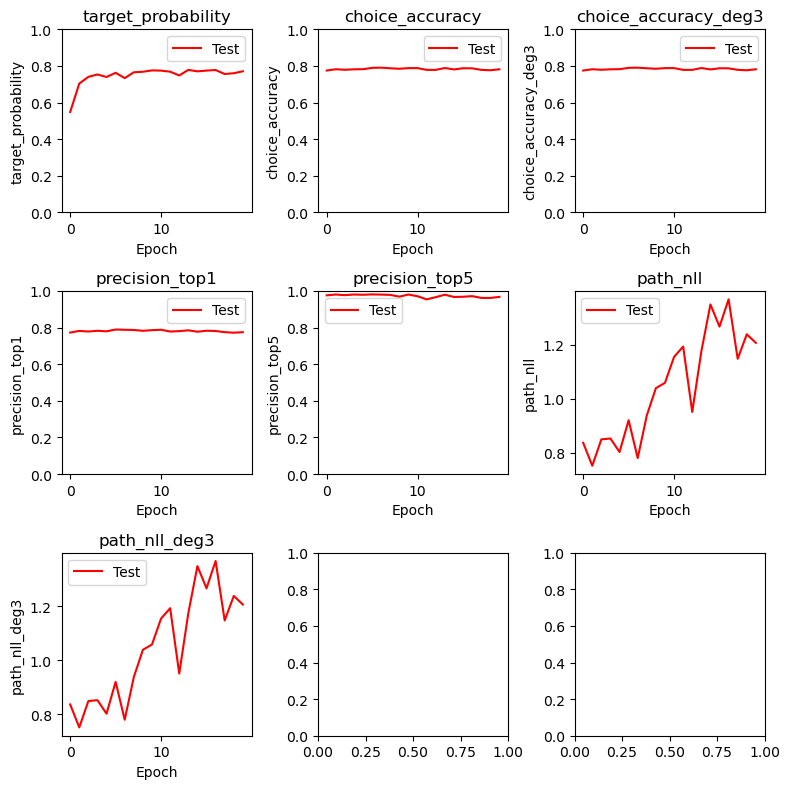

In [3]:
# plot training metrics
model.plot_train_test_metrics(test_only=True)

In [4]:
#start_node = 185
#end_node = 474
#node_dist, rw_weights = model.predict(start_node, end_node, 2)

In [5]:
# Load test data from file
test_dates = ['202206']
selection_start = 0
selection_end = -1
selection_step = 2
path_prefix = '../../data/paths/'
test_paths = dataloader_paths.load_path_test_data(path_prefix, network_name, test_dates, 
                                                  selection_start, selection_end, selection_step, data_version)

In [6]:
#### MAKE PREDICTIONS ####
prediction_task = 'path'  # 'next_nodes' or 'path'
n_walks = 200
n_start_nodes = 1
n_steps = 2   # only needed for next nodes prediction
n_predictions = 1
max_path_length = 150

predictions = model.predict(prediction_task, test_paths, n_start_nodes, n_steps, 
                            n_predictions, n_walks, max_path_length)

Making predictions for 761 samples
Progress: 10%...20%...30%...40%...50%...60%...70%...80%...90%...Done!


In [7]:
# save results as csv
predictions.to_csv(directory+path_format+'/predictions.csv')

In [8]:
# save metadata to file
if load_model == False:
    meta_dict['lr'] = model.config.lr
    meta_dict['loss'] = model.config.loss
    meta_dict['n_epochs'] = model.config.number_epoch
    meta_dict['target_prediction'] = model.config.target_prediction
meta_dict['n_walks'] = n_walks
meta_dict['n_start_nodes'] = n_start_nodes
meta_dict['n_steps'] = n_steps
meta_dict['prediction_task'] = prediction_task
meta_dict['model_type'] = 'Gretel'
meta_dict.update({'test_dates':str(test_dates),
                  'selection_start':selection_start,
                  'selection_end':selection_end,
                  'selection_step':selection_step,
                  'n_test_paths':len(test_paths)})
with open(directory+path_format+'/metadata.json', 'w') as json_file:
    json.dump(meta_dict, json_file)

In [9]:
'''
import pickle
# save model as pickle object
fileObj = open('../../models/gretel_prediction_models/trained_models/'+meta_dict['network_name']+'.obj', 'wb')
pickle.dump(model, fileObj)
fileObj.close()
'''

"\nimport pickle\n# save model as pickle object\nfileObj = open('../../models/gretel_prediction_models/trained_models/'+meta_dict['network_name']+'.obj', 'wb')\npickle.dump(model, fileObj)\nfileObj.close()\n"